In [8]:
%reset
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import random
import treecorr
from astropy.io import fits
import pickle as pk
import os.path
from os import path







Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [11]:
halo_inp = fits.open('/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/MICE_allhalos_Mlow_1e12.fits')

halo_inp[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   40 / length of dimension 1                          
NAXIS2  =             40655867 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'unique_gal_id'                                                       
TFORM1  = 'K       '                                                            
TTYPE2  = 'ra_gal  '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'dec_gal '        

In [12]:
ra_all, dec_all, z_all, lmhalo_all = halo_inp[1].data['ra_gal'],halo_inp[1].data['dec_gal'],halo_inp[1].data['z_cgal'], halo_inp[1].data['lmhalo']



In [13]:
len(lmhalo_all), len(np.unique(lmhalo_all))



(40655867, 26461)

In [16]:
flag_cen = halo_inp[1].data['flag_central']



In [19]:
lmhalo_all[0]



12.3959

In [7]:
zmin_array = [0.15, 0.45, 0.75]
zmax_array = [0.3, 0.6, 0.9]

massbin_min = [12, 12.5, 13, 13.5, 14, 14.5]
massbin_max = [12.5, 13, 13.5, 14, 14.5, 15]

len(np.where( (z_all > zmin_array[0]) & (z_all < zmax_array[0]) & (lmhalo_all > massbin_min[0])  & (lmhalo_all < massbin_max[0]) )[0])



612341

In [8]:
file_matter_mice = fits.open('/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/matter_ra_dec_r_z_L3072N4096-LC129-1in700.fits')[1].data
ra_m, dec_m, z_m = file_matter_mice['RA'],file_matter_mice['DEC'],file_matter_mice['Z']




In [9]:
len(np.where( (z_m > zmin_array[0]) & (z_m < zmax_array[0]) )[0])



915752

In [3]:

df = fits.open('/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/5785.fits')
df[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   48 / length of dimension 1                          
NAXIS2  =              1269073 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TTYPE1  = 'unique_gal_id'                                                       
TFORM1  = 'K       '                                                            
TTYPE2  = 'unique_halo_id'                                                      
TFORM2  = 'K       '                                                            
TTYPE3  = 'ra_gal  '        

In [5]:
uhl_id = df[1].data['unique_halo_id']



In [6]:
len(uhl_id), len(np.unique(uhl_id))



(1269073, 1269073)

In [4]:
import pickle as pk
import numpy as np

save_dir_gg_gm = '/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/measurements/halo_12.5_13.0/' 
save_dir = '/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/measurements/'
save_filename_gg = 'gg_lmhalo_12.5_13.0_3dcorr_r_0.8_50.0_nr_20_zbin_2_jk_True_njkradec_180_njkz_1_dsg_1_dsm_1.pk'
save_filename_mm = 'mm_3dcorr_r_0.8_50.0_nr_20_zbin_2_jk_True_njkradec_180_njkz_1_dsg_1_dsm_1.pk'
save_filename_gm = 'gm_lmhalo_12.5_13.0_3dcorr_r_0.8_50.0_nr_20_zbin_2_jk_True_njkradec_180_njkz_1_dsg_1_dsm_1.pk'

output_data_gg = pk.load(open(save_dir_gg_gm + save_filename_gg, "rb"))
output_data_gm = pk.load(open(save_dir_gg_gm + save_filename_gm, "rb"))
output_data_mm = pk.load(open(save_dir + save_filename_mm, "rb"))

xi_gg_full,xigg_big_all = output_data_gg['xi_gg_full'],output_data_gg['xigg_big_all']
xi_gm_full,xigm_big_all = output_data_gm['xi_gm_full'],output_data_gm['xigm_big_all']
xi_mm_full,ximm_big_all = output_data_mm['xi_mm_full'],output_data_mm['ximm_big_all']

njk = 180

xi_gg_mm_full = xi_gg_full/xi_mm_full
xi_gg_mm_mean = np.tile(xi_gg_mm_full.transpose(), (njk, 1))
xi_gg_mm_big_all = xigg_big_all/ximm_big_all
xi_gg_mm_sub = xi_gg_mm_big_all - xi_gg_mm_mean
xi_gg_mm_cov = (1.0 * (njk - 1.) / njk) * np.matmul(xi_gg_mm_sub.T, xi_gg_mm_sub)
xi_gg_mm_sig = np.sqrt(np.diag(xi_gg_mm_cov))

xi_gm_mm_full = xi_gm_full/xi_mm_full
xi_gm_mm_mean = np.tile(xi_gm_mm_full.transpose(), (njk, 1))
xi_gm_mm_big_all = xigm_big_all/ximm_big_all
xi_gm_mm_sub = xi_gm_mm_big_all - xi_gm_mm_mean
xi_gm_mm_cov = (1.0 * (njk - 1.) / njk) * np.matmul(xi_gm_mm_sub.T, xi_gm_mm_sub)
xi_gm_mm_sig = np.sqrt(np.diag(xi_gm_mm_cov))

output_data_gg_mm = dict(output_data_gg,**output_data_mm)
output_data_gg_mm['xi_gg_mm_full'] = xi_gg_mm_full
output_data_gg_mm['xi_gg_mm_big_all'] = xi_gg_mm_big_all
output_data_gg_mm['cov'] = xi_gg_mm_cov
output_data_gg_mm['sig'] = xi_gg_mm_sig

output_data_gm_mm = dict(output_data_gm,**output_data_mm)
output_data_gm_mm['xi_gm_mm_full'] = xi_gm_mm_full
output_data_gm_mm['xi_gm_mm_big_all'] = xi_gm_mm_big_all
output_data_gm_mm['cov'] = xi_gm_mm_cov
output_data_gm_mm['sig'] = xi_gm_mm_sig




In [6]:
xi_gg_mm_big_all.shape



(180, 20)

In [7]:
xi_gg_mm_mean_big = np.mean(xi_gg_mm_big_all,axis=0)
xi_gg_mm_mean_big.shape



(20,)

In [24]:
output_data_gg['r_gg'].shape,np.sqrt(xi_gg_mm_sig).shape, xi_gg_mm_full.shape



((20,), (20,), (20,))

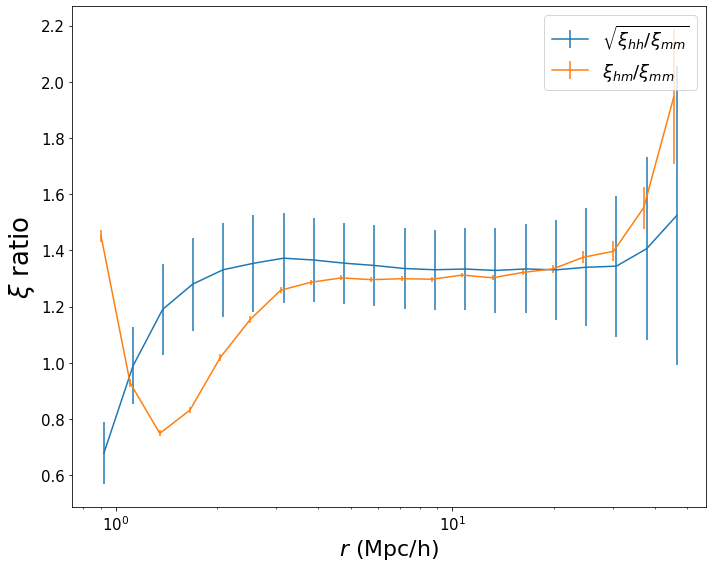

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (10,8))

# ax.plot(output_data_gg['r_gg'],xi_gg_mm_mean_big, 'r-')
ax.errorbar(1.02*output_data_gg['r_gg'],np.sqrt(xi_gg_mm_full), yerr=np.sqrt(xi_gg_mm_sig),label=r'$\sqrt{\xi_{hh}/\xi_{mm}}$')

ax.errorbar(output_data_gg['r_gg'],xi_gm_mm_full, yerr=xi_gm_mm_sig,label=r'${\xi_{hm}/\xi_{mm}}$')

# ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(-1,1)
plt.xlabel(r'$r$ (Mpc/h)', fontsize=22)
plt.ylabel(r'$\xi$ ratio', fontsize=26)
ax.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# plt.savefig('cross_corr_comp.png')
plt.show()









In [ ]:
from scipy.stats import gaussian_kde
import numpy as np
from fileios import *

# Need to parallelize these... Very slow indeed! :(


def kde(x, x_grid, bandwidth=0.2):
    """Kernel Density Estimation with Scipy"""
    kdev = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1))
    return kdev.evaluate(x_grid)


def generate_rand_from_pdf(pdf, x_grid, N):
    """Method to generate 'N' no. of random numbers from input probability distribution function (pdf) in form of kernel density"""
    cdf = np.cumsum(pdf)
    cdf = cdf / cdf[-1]
    values = np.random.rand(N)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf, nz = x_grid[value_bins], pdf[value_bins]
    print (nz)
    return random_from_cdf, nz


def randang(maskfile, randcatsize):
    """Method to calculate RA and DEC from mangle .ply file"""
    mangle = readmaskfile(maskfile)
    rar, decr = mangle.genrand(randcatsize)
    rar = np.asfarray(rar)
    decr = np.asfarray(decr)
    return rar, decr


def randz(z, randcatsize):
    """Method to calculate random redshift values from input redshift distribution"""
    x_grid = np.linspace(min(z), max(z), num=randcatsize)
    pdf = kde(z, x_grid, bandwidth=1e-3)
    randzv, nz = generate_rand_from_pdf(pdf, x_grid, randcatsize)
    # randzv = np.array(randzv, np.double)
    rweights = 1.0/(1.0+10000*nz)
    rweights = rweights/np.mean(rweights)
    return randzv, rweights


def randcatprepz(datfname, randcatsize, maskfile, model):
    """Method to generate random catalog from mangle mask and input redshift distribution for given cosmology"""
    print("Generating random catalog of %d size in file randcat.dat... "% randcatsize)
    if datfname.lower().endswith('.fits'):
        data = readfitsfile(datfname, 'internal')
    else:
        data = readinfile(datfname, 'internal')

    for x in data.colnames:
        if x.lower() == 'z':
            z = np.array(data[x])
        # elif x.lower()=='nz':
        #     rweights=1.0/(1.0+4.0*np.array(data[x]))
        #     rweights=weights/np.mean(rweights)
        # else:
        #
    zr, rweights = randz(z, randcatsize)
    ra, dec = randang(maskfile, randcatsize)
    rar = ra*pi/180.0
    decr = dec*pi/180.0
    rcatfname = "randcat.dat"# %(datfname)
    storerandcat(zr, ra, dec, rweights, rcatfname)
    print ("Preparing random catalog into 3xN matrices in [zr,rar,decr] format" )
    datR = np.array([zr, rar, decr])
    datR.reshape(3, len(zr))
    datR = datR.transpose()
    # print(datR)
    return datR, rweights


